In [54]:
import pandas as pd
import re
import os
import dotenv
dotenv.load_dotenv(".env")

False

In [55]:
# dataset link https://www.kaggle.com/datasets/hetbabariya/imdb-movies-data-collection-5000-records?resource=download
df = pd.read_csv("IMDB_Movies_Dataset.csv", index_col=0)
df.head()

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes


In [56]:
df = df.rename(
    columns={"Average Rating": "Rating"}
)
df.columns

Index(['Title', 'Rating', 'Director', 'Writer', 'Metascore', 'Cast',
       'Release Date', 'Country of Origin', 'Languages', 'Budget',
       'Worldwide Gross', 'Runtime'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4989 non-null   object 
 1   Rating             4989 non-null   float64
 2   Director           4989 non-null   object 
 3   Writer             4988 non-null   object 
 4   Metascore          3055 non-null   float64
 5   Cast               4982 non-null   object 
 6   Release Date       4989 non-null   object 
 7   Country of Origin  4986 non-null   object 
 8   Languages          4968 non-null   object 
 9   Budget             2651 non-null   object 
 10  Worldwide Gross    3895 non-null   object 
 11  Runtime            4989 non-null   object 
dtypes: float64(2), object(10)
memory usage: 506.7+ KB


In [58]:
df.describe(include="all")

,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
count,4989,4989.000000,4989,4988,3055.000000,4982,4989,4986,4968,2651,3895,4989
unique,4927,NaN,2648,4422,NaN,4981,4516,812,1084,882,3865,182
top,Little Women,NaN,Steven Spielberg,Ingmar Bergman,NaN,Slavoj Zizek,"October 4, 2017 (India)",United States,English,"$15,000,000 (estimated)",$509,1 hour 35 minutes
freq,4,NaN,24,17,NaN,2,20,1624,1514,63,7,109
mean,NaN,7.632892,NaN,NaN,74.684452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.365243,NaN,NaN,12.298911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,7.200000,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,7.300000,NaN,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,7.600000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.800000,NaN,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df["Runtime"].value_counts()

Runtime
1 hour 35 minutes     109
1 hour 50 minutes     109
1 hour 43 minutes     100
1 hour 58 minutes      94
1 hour 30 minutes      92
                     ... 
59 minutes              1
7 hours 1 minute        1
5 hours 50 minutes      1
1 hour                  1
55 minutes              1
Name: count, Length: 182, dtype: int64

In [60]:
def runtime_to_minutes(string: str) -> int:
    hours = re.search(r"(\d+) hours?", string)
    if hours:
        hours = int(hours.group(1))
    else:
        hours = 0
    minutes = re.search(r"(\d+) minutes", string)
    if minutes:
        minutes = int(minutes.group(1))
    else:
        minutes = 0
    return hours * 60 + minutes


runtime_to_minutes("2 hours 25 minutes")

145

In [61]:
df["Runtime (minutes)"] = df["Runtime"].apply(runtime_to_minutes)
df.head()

,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Runtime (minutes)
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes,142
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes,145
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes,175
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes,85
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes,135


In [62]:
def money_to_usd(string: str | None) -> int:
    if not isinstance(string, str) or not "$" in string:
        return None
    budget = int(re.sub(r"[^\d]", "", string))
    return budget
money_to_usd("$6,000,000 (estimated)")

6000000

In [63]:
df["Budget (usd)"] = df["Budget"].apply(money_to_usd)
df["Worldwide Gross (usd)"] = df["Worldwide Gross"].apply(money_to_usd)
df["Budget (usd)"].head()

0    25000000.0
1           NaN
2     6000000.0
3           NaN
4           NaN
Name: Budget (usd), dtype: float64

In [64]:
df["Budget (usd)"] = df["Budget (usd)"].astype("Int64")
df["Worldwide Gross (usd)"] = df["Worldwide Gross (usd)"].astype("Int64")
df["Budget (usd)"].head()

0    25000000
1        <NA>
2     6000000
3        <NA>
4        <NA>
Name: Budget (usd), dtype: Int64

In [65]:
df["Profit (usd)"] = df["Worldwide Gross (usd)"] - df["Budget (usd)"]
df.head()

,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Runtime (minutes),Budget (usd),Worldwide Gross (usd),Profit (usd)
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes,142,25000000,29332133,4332133
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes,145,<NA>,3513659,<NA>
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes,175,6000000,250342198,244342198
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes,85,<NA>,<NA>,<NA>
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes,135,<NA>,<NA>,<NA>


In [66]:
highest_budget = df.sort_values(by="Budget (usd)", ascending=False)[:10]
highest_budget.head(3)

,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Runtime (minutes),Budget (usd),Worldwide Gross (usd),Profit (usd)
164,Avengers: Endgame,8.4,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely, Stan Lee",78.0,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","April 26, 2019 (India)",United States,"English, Japanese, Xhosa, German","$356,000,000 (estimated)","$2,799,439,100",3 hours 1 minute,180,356000000,2799439100,2443439100
378,The Little Mermaid,7.2,Rob Marshall,"David Magee, Hans Christian Andersen, John Musker",59.0,"Halle Bailey, Jonah Hauer-King, Melissa McCart...","May 26, 2023 (India)",United States,English,"$355,100,000 (estimated)","$569,626,289",2 hours 15 minutes,135,355100000,569626289,214526289
18,Avatar: The Way of Water,7.5,James Cameron,"James Cameron, Rick Jaffa, Amanda Silver",67.0,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","December 16, 2022 (India)",United States,English,"$350,000,000 (estimated)","$2,320,250,281",3 hours 12 minutes,192,350000000,2320250281,1970250281


<Axes: xlabel='Runtime (minutes)', ylabel='Budget (usd)'>

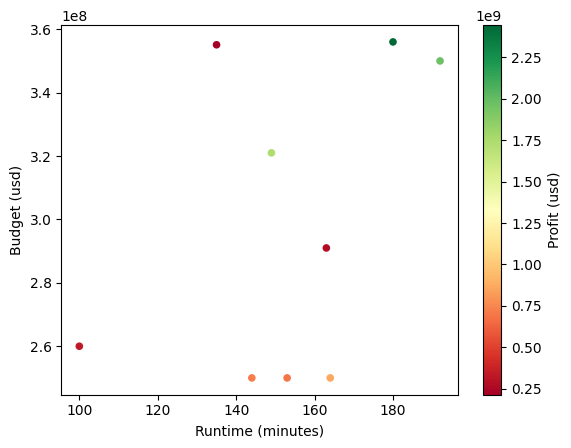

In [67]:
# matplotlib under the hood
# install matplotlib first 
highest_budget.plot(
    kind="scatter",
    x="Runtime (minutes)",
    y="Budget (usd)",
    c="Profit (usd)",
    colormap="RdYlGn",
)

In [68]:
# Cannot mask with non-boolean array containing NA / NaN values
df["Cast"].fillna("", inplace=True)
df[df["Cast"].str.contains("Johnny Depp")]

/var/folders/6k/pgkjzwf5565dsnb9yf06xcxm0000gn/T/ipykernel_68338/2633735925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cast"].fillna("", inplace=True)


,Title,Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Runtime (minutes),Budget (usd),Worldwide Gross (usd),Profit (usd)
494,Pirates of the Caribbean: The Curse of the Bla...,8.1,Gore Verbinski,"Ted Elliott, Terry Rossio, Stuart Beattie",63.0,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...","August 15, 2003 (India)",United States,English,"$140,000,000 (estimated)","$654,264,546",2 hours 23 minutes,143,140000000,654264546,514264546
26,Platoon,8.1,Oliver Stone,Oliver Stone,92.0,"Charlie Sheen, Tom Berenger, Willem Dafoe, Kei...","February 13, 1989 (India)","United States, United Kingdom","English, Vietnamese","$6,000,000 (estimated)","$138,545,632",2 hours,120,6000000,138545632,132545632
495,Edward Scissorhands,7.9,Tim Burton,"Tim Burton, Caroline Thompson",74.0,"Johnny Depp, Winona Ryder, Dianne Wiest, Antho...","January 1, 1992 (India)",United States,English,"$20,000,000 (estimated)","$86,024,005",1 hour 45 minutes,105,20000000,86024005,66024005
355,Ed Wood,7.8,Tim Burton,"Rudolph Grey, Scott Alexander, Larry Karaszewski",71.0,"Johnny Depp, Martin Landau, Sarah Jessica Park...",1994 (India),United States,English,"$18,000,000 (estimated)","$5,888,045",2 hours 7 minutes,127,18000000,5888045,-12111955
141,What's Eating Gilbert Grape,7.7,Lasse Hallström,Peter Hedges,73.0,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...","March 4, 1994 (United States)",United States,English,"$11,000,000 (estimated)","$10,032,765",1 hour 58 minutes,118,11000000,10032765,-967235
153,Donnie Brasco,7.7,Mike Newell,"Joseph D. Pistone, Richard Woodley, Paul Attan...",77.0,"Al Pacino, Johnny Depp, Michael Madsen, Bruno ...","February 9, 2017 (India)",United States,"English, Italian, Japanese","$35,000,000 (estimated)","$124,909,762",2 hours 7 minutes,127,35000000,124909762,89909762
218,Finding Neverland,7.7,Marc Forster,"Allan Knee, David Magee",67.0,"Johnny Depp, Kate Winslet, Julie Christie, Rad...","January 28, 2005 (India)","United States, United Kingdom",English,"$25,000,000 (estimated)","$116,650,613",1 hour 46 minutes,106,25000000,116650613,91650613
311,Gonzo: The Life and Work of Dr. Hunter S. Thom...,7.6,Alex Gibney,"Alex Gibney, Hunter S. Thompson",73.0,"Hunter S. Thompson, Johnny Depp, Joe Cairo, Da...","July 18, 2008 (United States)",United States,"English, Portuguese",NaN,"$1,491,958",2 hours,120,<NA>,1491958,<NA>
464,When You're Strange,7.6,Tom DiCillo,Tom DiCillo,55.0,"Johnny Depp, John Densmore, Robby Krieger, Ray...","May 12, 2010 (United States)",United States,English,NaN,"$1,194,182",1 hour 26 minutes,86,<NA>,1194182,<NA>
67,Fear and Loathing in Las Vegas,7.5,Terry Gilliam,"Hunter S. Thompson, Terry Gilliam, Tony Grisoni",41.0,"Johnny Depp, Benicio Del Toro, Tobey Maguire, ...","May 22, 1998 (United States)",United States,English,"$18,500,000 (estimated)","$10,680,275",1 hour 58 minutes,118,18500000,10680275,-7819725


In [69]:
df.groupby(by="Director").agg(
    {
        "Worldwide Gross (usd)": "sum"
    }
).sort_values(by="Worldwide Gross (usd)", ascending=False).head(10).reset_index()

,Director,Worldwide Gross (usd)
0,James Cameron,8705319635
1,Steven Spielberg,7988558298
2,"Anthony Russo, Joe Russo",6721322058
3,Peter Jackson,6484962056
4,Christopher Nolan,6205459936
5,David Yates,5003353447
6,Jon Watts,3966372984
7,Joss Whedon,2966001713
8,J.J. Abrams,2924357232
9,Robert Zemeckis,2793892268


In [70]:
df["Year"] = df["Release Date"].apply(lambda x: int(re.search(r"\d{4}", x).group()))
df["Decade"] = df["Year"].apply(lambda x: round(x, -1))
df[["Release Date", "Year", "Decade"]].head()

,Release Date,Year,Decade
0,"October 14, 1994 (India)",1994,1990
1,"November 8, 2024 (Japan)",2024,2020
2,1978 (India),1978,1980
3,"April 1, 1975 (Turkey)",1975,1980
4,"September 25, 2001 (India)",2001,2000


In [71]:
# install pyarrow
df.to_parquet("pandas_parquet", partition_cols=["Decade"])

In [72]:
# https://github.com/yhat/pandasql/
# SQLite

In [73]:
# requires sqlalchemy
pd.read_sql_table(
    "orders",
    os.environ["SQL_CONNECTION"]
)

KeyError: 'SQL_CONNECTION'

Performance:
https://towardsdatascience.com/high-performance-data-processing-pandas-2-vs-polars-a-vcpu-perspective-e922d3064f4e

# Window functions

In [74]:
# I hate reusing df so much)))) I shoot my feet multiple times with is. 
# Because when you run this cell multiple times you will get different results because you overwriting df variable

# Split and explode languages
df['languages_lst'] = df['Languages'].str.split(',')
df = df.explode('languages_lst')
df['language'] = df['languages_lst'].str.strip()
df = df[df['language'].notna()]

# Clean and parse dates
df['date_cleaned'] = df['Release Date'].str.replace(r'\(.+\)', '', regex=True).str.strip()

# Try multiple date formats
df['date_v1'] = pd.to_datetime(df['date_cleaned'], format='%B %d, %Y', errors='coerce')
df['date_v2'] = pd.to_datetime(df['date_cleaned'], format='%Y', errors='coerce')
df['date_v3'] = pd.to_datetime(df['date_cleaned'], format='%B %Y', errors='coerce')
# errors='coerce' is same as spark spark.conf.set("spark.sql.legacy.timeParserPolicy", "CORRECTED")


# Coalesce dates
df['date'] = df['date_v1'].combine_first(df['date_v2']).combine_first(df['date_v3'])

# Sort and calculate differences between movies
df = df.sort_values(['language', 'date'])
df['previous_movie_date'] = df.groupby('language')['date'].shift()
df['previous_movie_title'] = df.groupby('language')['Title'].shift()

# Filter rows with previous movie dates
df = df[df['previous_movie_date'].notna()]

# Calculate date differences
df['previous_movie_diff'] = (df['date'] - df['previous_movie_date']).dt.days
df['previous_movie_diff_years'] = (df['previous_movie_diff'] / 365).round()
# Cody suggestion was df['previous_movie_diff_years'] = ((df['date'] - df['previous_movie_date']).dt.total_seconds() / (365.25 * 24 * 60 * 60)).round()
# 365.25? He really takes into account leap years? AI vs Me 1-0


# Get maximum difference for each language
df['rn'] = df.groupby('language')['previous_movie_diff'].rank(method='first', ascending=False)
df = df[df['rn'] == 1]



# Select final columns
result = df[['Title', 'date', 'previous_movie_title', 'previous_movie_date',
             'previous_movie_diff', 'previous_movie_diff_years', 'language', 'Languages']]
result = result.rename(columns={'Title': 'title'})
result

,title,date,previous_movie_title,previous_movie_date,previous_movie_diff,previous_movie_diff_years,language,Languages
344,Rabbit-Proof Fence,2002-02-21,Walkabout,1971-07-01,11193,31.0,Aboriginal,"English, Aboriginal"
335,Tsotsi,2005-12-23,Lethal Weapon 2,1990-01-01,5835,16.0,Afrikaans,"Zulu, Sotho, Xhosa, Afrikaans, English"
190,Triangle of Sadness,2022-09-18,Beasts of No Nation,2017-10-04,1810,5.0,Akan,"English, Swedish, German, French, Greek, Tagal..."
481,Vivement dimanche!,1983-08-10,The Ipcress File,1965-03-18,6719,18.0,Albanian,"French, Albanian"
207,Children of a Lesser God,1988-06-22,The Miracle Worker,1962-07-28,9461,26.0,American Sign Language,"English, American Sign Language"
...,...,...,...,...,...,...,...,...
381,Pride,2014-09-12,Becket,1964-03-11,18447,51.0,Welsh,"English, Welsh"
135,Io Capitano,2023-09-07,Biutiful,2010-10-22,4703,13.0,Wolof,"Wolof, French, Arabic, English"
335,Tsotsi,2005-12-23,The Lion King,1994-10-29,4073,11.0,Xhosa,"Zulu, Sotho, Xhosa, Afrikaans, English"
452,Obchod na korze,1965-10-08,Since You Went Away,1944-07-20,7750,21.0,Yiddish,"Slovak, Yiddish, German, Latin"
